ATIKA HANIFAH

Import Packages/Library

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

In [36]:
df = pd.read_csv('Assignment Data Analyst MSIB Batch 7.csv')

In [37]:
df.head()

,ga:sourceMedium,ga:pageTitle,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233


In [38]:
df.shape

(156, 7)

In [39]:
# Periksa tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ga:sourceMedium         156 non-null    object 
 1   ga:pageTitle            156 non-null    object 
 2   ga:users                155 non-null    float64
 3   ga:bounceRate           155 non-null    float64
 4   ga:pageviews            155 non-null    float64
 5   ga:pageviewsPerSession  155 non-null    float64
 6   ga:avgTimeOnPage        155 non-null    float64
dtypes: float64(5), object(2)
memory usage: 8.7+ KB


In [40]:
# periksa duplikasi data
print('Data duplikasi: ', df.duplicated().sum())

Data duplikasi:  0


Cleaning Data

In [15]:
# missing values
print(df.isnull().sum())

ga:sourceMedium           0
ga:pageTitle              0
ga:users                  1
ga:bounceRate             1
ga:pageviews              1
ga:pageviewsPerSession    1
ga:avgTimeOnPage          1
dtype: int64


In [16]:
columns_to_fill = ['ga:users','ga:bounceRate','ga:pageviews', 'ga:pageviewsPerSession', 'ga:avgTimeOnPage'] 
for col in columns_to_fill:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)
    
print(df.isnull().sum())

ga:sourceMedium           0
ga:pageTitle              0
ga:users                  0
ga:bounceRate             0
ga:pageviews              0
ga:pageviewsPerSession    0
ga:avgTimeOnPage          0
dtype: int64


Analisis Perbandingan kinerja antara 2 sumber

In [21]:
source_medium_summary = df.groupby('ga:sourceMedium').agg({
    'ga:users': 'sum',
    'ga:bounceRate': 'mean',
    'ga:pageviews': 'sum',
    'ga:pageviewsPerSession': 'mean',
    'ga:avgTimeOnPage': 'mean'
}).reset_index()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1584\2756742894.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ga:sourceMedium', y=col, data=source_medium_summary, palette='viridis')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1584\2756742894.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  for p in sns.barplot(x='ga:sourceMedium', y=col, data=source_medium_summary, palette='PuBu').patches:
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1584\2756742894.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ga:sourceMedium', y=col, data=source_medium

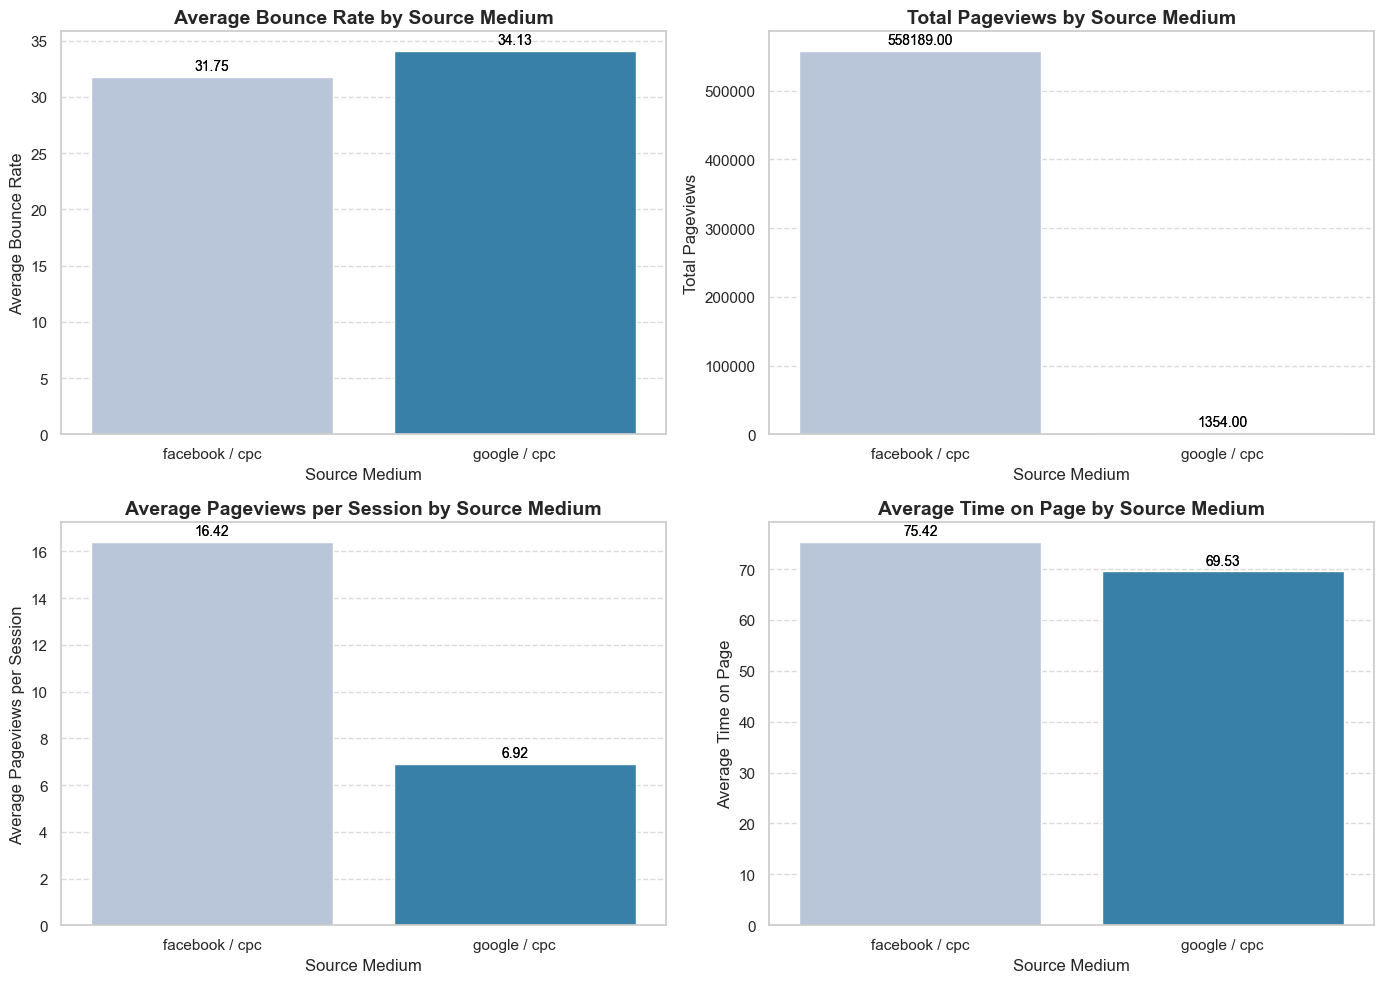

In [22]:
# kolom and judul untuk the plots
plot_params = {
    'ga:bounceRate': 'Average Bounce Rate',
    'ga:pageviews': 'Total Pageviews',
    'ga:pageviewsPerSession': 'Average Pageviews per Session',
    'ga:avgTimeOnPage': 'Average Time on Page'
}

# ukuran plot
plt.figure(figsize=(14, 10))

for i, (col, title) in enumerate(plot_params.items(), 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='ga:sourceMedium', y=col, data=source_medium_summary, palette='viridis')
      
    # customized font sizes
    plt.title(title + ' by Source Medium', fontsize=14, fontweight='bold')
    plt.xlabel('Source Medium', fontsize=12)
    plt.ylabel(title, fontsize=12)
    
    # Adding gridlines
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Adding annotations to each bar
    for p in sns.barplot(x='ga:sourceMedium', y=col, data=source_medium_summary, palette='PuBu').patches:
        plt.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')
plt.tight_layout()
plt.show()

Top 10 Artikel dengan Rata-rata Waktu Terlama di Halaman

In [18]:
# Mengambil top 10 judul artikel dengan waktu rata-rata paling lama di halaman
top_10_titles = df.sort_values(by='ga:avgTimeOnPage', ascending=False).head(10)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1584\3992741066.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ga:avgTimeOnPage', y='ga:pageTitle', data=top_10_titles, palette='PuBu')


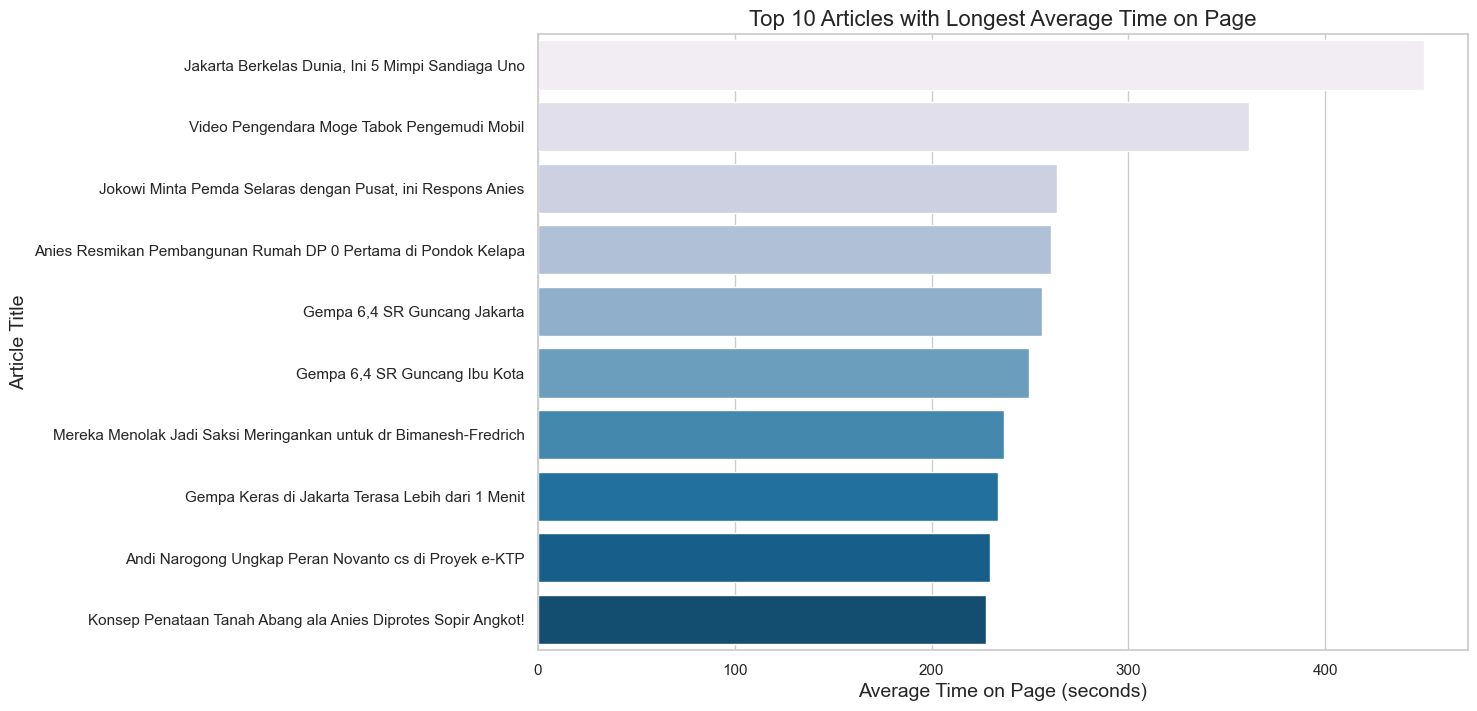

In [20]:
# Membuat bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='ga:avgTimeOnPage', y='ga:pageTitle', data=top_10_titles, palette='PuBu')

# Menambahkan judul dan label
plt.title('Top 10 Articles with Longest Average Time on Page', fontsize=16)
plt.xlabel('Average Time on Page (seconds)', fontsize=14)
plt.ylabel('Article Title', fontsize=14)

# Menampilkan plot
plt.show()

Top 10 Artikel Dengan Pageviews Tertinggi

In [24]:
# mengambil top 10 dengan pageviews tertinggi
sorted_df = df.sort_values(by='ga:pageviews', ascending=False)
top_10_articles = sorted_df.head(10)

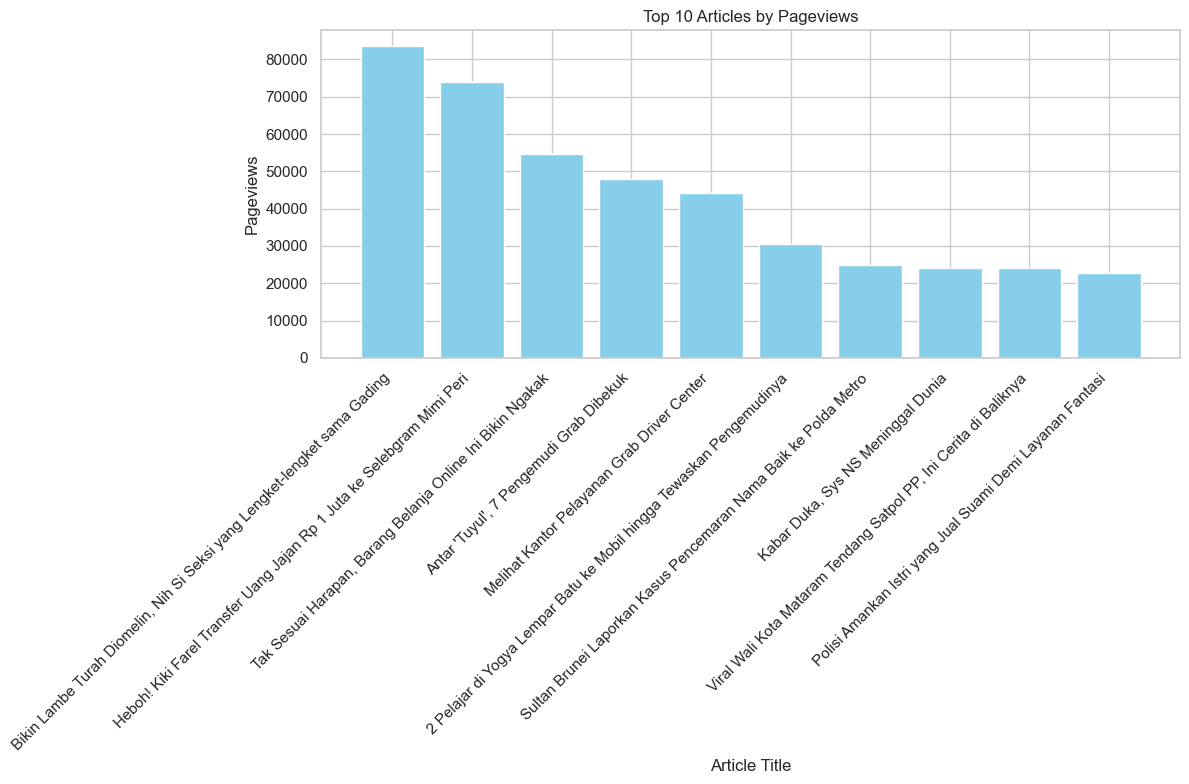

In [25]:
# Visualisasi
plt.figure(figsize=(12, 8))
plt.bar(top_10_articles['ga:pageTitle'], top_10_articles['ga:pageviews'], color='skyblue')
plt.title('Top 10 Articles by Pageviews')
plt.xlabel('Article Title')
plt.ylabel('Pageviews')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability

plt.tight_layout()
plt.show()

Analisis Pageviews per Session Berdasarkan Kategori

In [26]:
# daftar kata kunci untuk setiap kategori
kategori_dict = {
    'Entertainment': ['seleb', 'artis', 'gosip', 'film', 'musik', 'hiburan', 'transgender','lambe'],
    'Kejahatan': ['bunuh', 'tangkap','lempar','lapor','meninggal','kasus', 'tipu','tewas','polisi', 'tindak', 'tendang','kejahatan', 'penjara'],
    'Teknologi': ['gadget', 'teknologi', 'ponsel','xiaomi', 'smartphone', 'laptop'],
    'Politik': ['politik', 'pemerintah', 'anies','dpr', 'menteri', 'presiden', 'pemerintahan'],
    'Bencana': ['gempa', 'bencana', 'kecelakaan', 'banjir', 'kebakaran']
}

In [27]:
# Fungsi untuk menentukan kategori berdasarkan judul artikel
def get_kategori(judul, kategori_dict):
    for kategori, keywords in kategori_dict.items():
        if any(keyword in judul.lower() for keyword in keywords):
            return kategori
    return 'Lainnya'  # Untuk judul yang tidak masuk kategori apapun


In [28]:
# Menambahkan kolom kategori berdasarkan judul artikel
df['Kategori'] = df['ga:pageTitle'].apply(lambda x: get_kategori(x, kategori_dict))

In [29]:
# Menghitung rata-rata pageviews per session by kategori
df_pageviews_per_session = df.groupby('Kategori')['ga:pageviewsPerSession'].mean().reset_index()
df_pageviews_per_session = df_pageviews_per_session.sort_values(
    by='ga:pageviewsPerSession', ascending=False)

In [30]:
# Menampilkan hasil analisis
print(df_pageviews_per_session)

        Kategori  ga:pageviewsPerSession
4        Politik               44.158249
2      Kejahatan               15.930021
0        Bencana               15.108479
3        Lainnya               14.993956
1  Entertainment               12.050600
5      Teknologi                2.805128


In [31]:
# Menghitung panjang judul artikel
df['judul_panjang'] = df['ga:pageTitle'].apply(len)

In [32]:
# Melihat beberapa baris pertama untuk memastikan panjang judul sudah dihitung
print(df[['ga:pageTitle', 'judul_panjang', 'ga:users']].head())

                                        ga:pageTitle  judul_panjang  ga:users
0  Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...             73   13736.0
1  Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...             70   15909.0
2  Tak Sesuai Harapan, Barang Belanja Online Ini ...             58    7748.0
3            Antar 'Tuyul', 7 Pengemudi Grab Dibekuk             39   43893.0
4        Melihat Kantor Pelayanan Grab Driver Center             43   41155.0


In [33]:
# Menghitung korelasi antara panjang judul dan jumlah pengguna
correlation = df['judul_panjang'].corr(df['ga:users'])
print(f'Nilai Korelasi: {correlation:.2f}')

Nilai Korelasi: 0.01
